In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [3]:
PATH = '/Users/dhyungseoklee/Projects/data/'

In [22]:
df = pd.read_csv(PATH + 'breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [24]:
# drop columns that are not going to be used for modeling

df = df.drop(columns = ['id','Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
X = df.drop(columns = 'diagnosis').values
y = df['diagnosis'].values

In [38]:
# convert target strings to integers for modeling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_cat = le.fit_transform(y)

In [42]:
# splitting into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size = 0.25, shuffle = False)

In [52]:
# baseline modeling for neural network
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

K.clear_session()

model = Sequential()
model.add(Dense(16, input_dim = 30, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(5, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate = 0.01)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

Train on 426 samples, validate on 143 samples
Epoch 1/30
426/426 - 0s - loss: 10.3963 - acc: 0.4319 - val_loss: 3.3746 - val_acc: 0.4126
Epoch 2/30
426/426 - 0s - loss: 1.5948 - acc: 0.5540 - val_loss: 0.9432 - val_acc: 0.4196
Epoch 3/30
426/426 - 0s - loss: 0.5897 - acc: 0.7113 - val_loss: 0.5182 - val_acc: 0.6993
Epoch 4/30
426/426 - 0s - loss: 0.3317 - acc: 0.8662 - val_loss: 0.3804 - val_acc: 0.8531
Epoch 5/30
426/426 - 0s - loss: 0.2777 - acc: 0.9202 - val_loss: 0.4992 - val_acc: 0.8112
Epoch 6/30
426/426 - 0s - loss: 0.2802 - acc: 0.8991 - val_loss: 0.3607 - val_acc: 0.8392
Epoch 7/30
426/426 - 0s - loss: 0.2388 - acc: 0.9272 - val_loss: 0.3108 - val_acc: 0.8741
Epoch 8/30
426/426 - 0s - loss: 0.2269 - acc: 0.9272 - val_loss: 0.3320 - val_acc: 0.8601
Epoch 9/30
426/426 - 0s - loss: 0.2194 - acc: 0.9319 - val_loss: 0.3446 - val_acc: 0.8601
Epoch 10/30
426/426 - 0s - loss: 0.2142 - acc: 0.9225 - val_loss: 0.2725 - val_acc: 0.9021
Epoch 11/30
426/426 - 0s - loss: 0.2208 - acc: 0.915

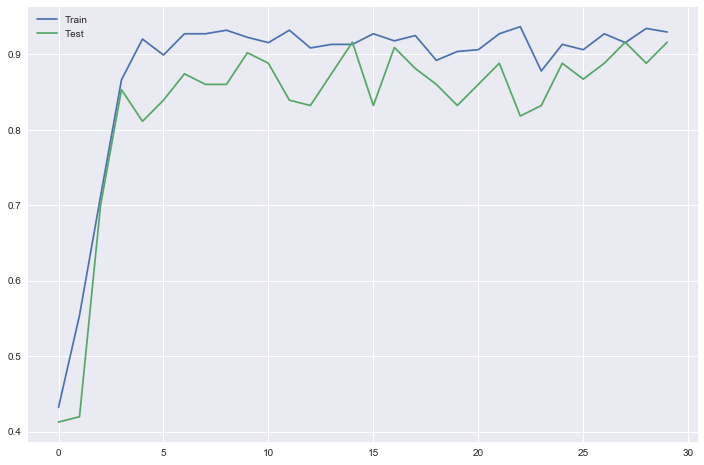

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 0, patience = 25)

history = model.fit(X_train, y_train,
                    epochs = 30,
                    verbose = 2,
                    batch_size = 32, 
                    callbacks = [es],
                    validation_data = (X_test, y_test))

plt.figure(figsize=(12,8))
plt.plot(history.history['acc'], label ='Train')
plt.plot(history.history['val_acc'], label = 'Test')
plt.legend()
plt.show()

Not too bad for first try. We can definitely improve by tuning hyperparameters

Try KFold Cross Validation with scaled data

In [68]:
# KFold Cross Validation
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input

# creating model with keras functional API
def model():
    inputs = Input(shape = (30,))
    
    x = Dense(16, activation = 'relu')(inputs)
    x = Dropout(0.2)(x)
    x = Dense(5, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(1, activation = 'sigmoid')(x)
    
    model = Model(inputs = inputs, outputs = output)
    opt = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = opt, metrics = ['accuracy'])
    
    return model

In [76]:
# Evaluating both scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scalers = []
scalers.append(('standard', StandardScaler()))
scalers.append(('MinMax', MinMaxScaler()))
estimator = KerasClassifier(build_fn = model, epochs = 50, verbose = 0, batch_size = 32 )

for name,scaler in scalers:
    sc = scaler
    X_sc = sc.fit_transform(X)
    cv_score = cross_val_score(estimator, X_sc, y_cat, cv = 10)
    print(name + ':', cv_score.mean())

standard: 0.9682957470417023
MinMax: 0.9666666686534882


Scaling and using Kfold produces much higher accuracy. However, there is no big difference between standard and minmax scaler.